<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/code_Antoine/R%C3%A9duction_de_dimension_Antoine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importation librairies

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

from sklearn.preprocessing import StandardScaler

## Récupération dataset

In [3]:
! rm -f *.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/df_training_mod.csv
df_training_mod = pd.read_csv('df_training_mod.csv')

--2023-05-26 10:03:22--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/df_training_mod.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2666373 (2.5M) [text/plain]
Saving to: ‘df_training_mod.csv’

df_training_mod.csv 100%[===================>]   2.54M  --.-KB/s    in 0.08s   

2023-05-26 10:03:22 (32.9 MB/s) - ‘df_training_mod.csv’ saved [2666373/2666373]



### Diviser labels et colonnes

In [4]:
true_labels = df_training_mod['Binar OP130_Resultat_Global_v'].copy()

In [8]:
df = df_training_mod.drop(columns=['Binar OP130_Resultat_Global_v', 'Unnamed: 0'])

### Scaling

In [9]:
scaler = StandardScaler()
X_data = scaler.fit_transform(df)

## Détermination de la matrice de valeurs propres

The  12  singular values are
[322.01873073 228.88927205 205.00038038 196.73690539 194.69464665
 179.43690308 167.56208059 165.40706861 137.56003517 120.4586929
 101.21785289  90.24855551]

 The variances of the principal components are



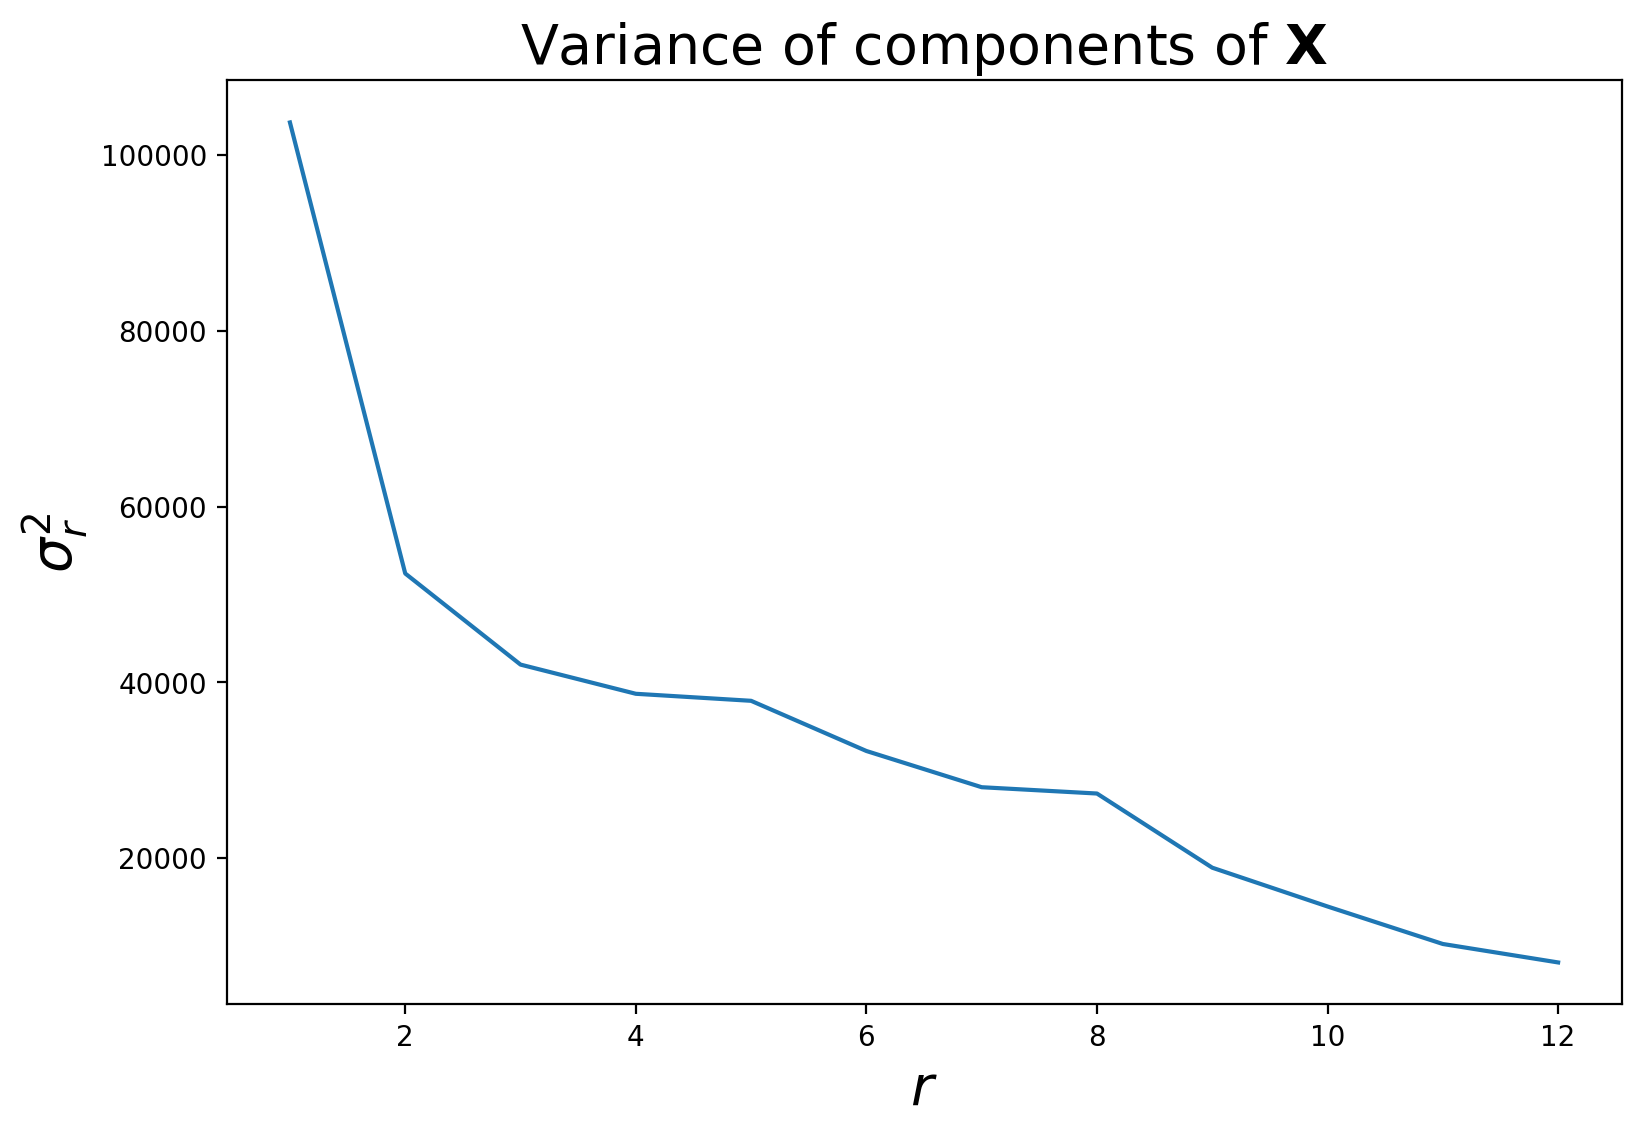

In [10]:
U,Sigma,Vt = np.linalg.svd(X_data,full_matrices=False)

print("The ", len(Sigma), " singular values are")
print(Sigma)

Sigma_squared = np.square(Sigma)

### Plotting
print("\n The variances of the principal components are")
fig = plt.figure(figsize=(9,6))
plt.plot(range(1,1+len(Sigma_squared)),Sigma_squared)
plt.xlabel(r'$r$',size=20)
plt.ylabel(r'$\sigma_r^2$',size=20)
plt.title(r'Variance of components of $\mathbf{X}$',size=20)
print('')

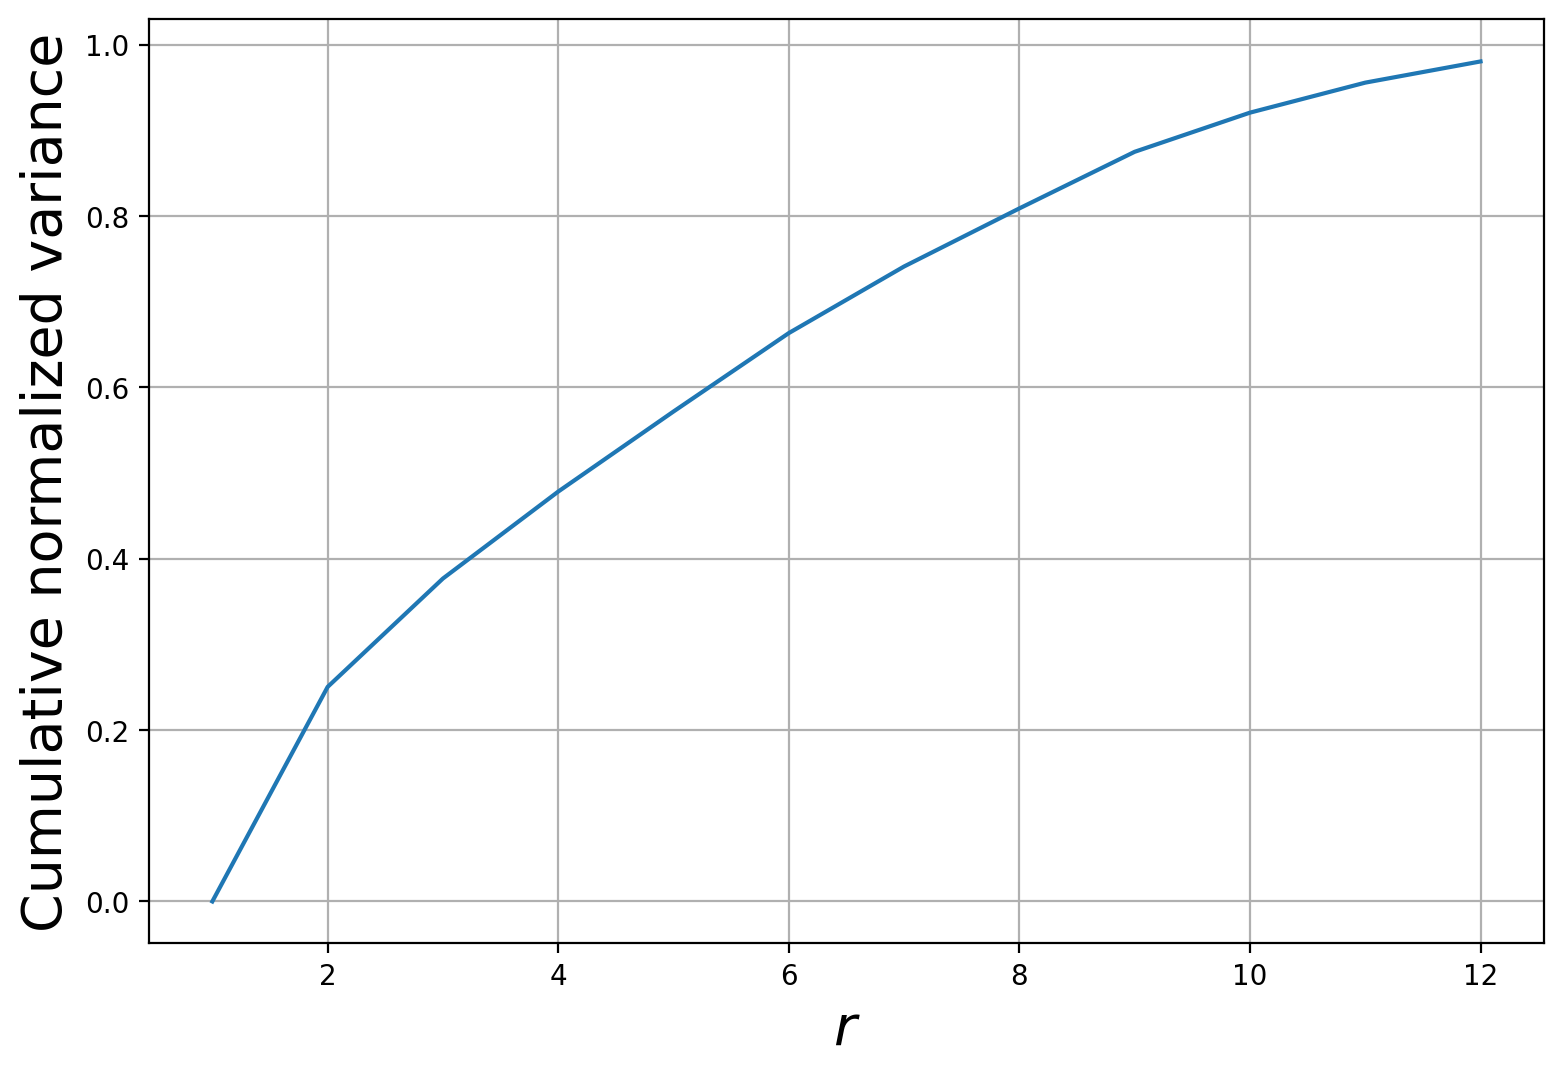

In [11]:
total_variance = sum(Sigma_squared)
cumul = [ sum(Sigma_squared[0:i]/total_variance) for i in range(len(Sigma_squared))]

### Plotting
fig = plt.figure(figsize=(9,6))
plt.plot(range(1,1+len(cumul)),cumul)
plt.xlabel(r'$r$',size=20)
plt.ylabel(r'Cumulative normalized variance',size=20)
plt.grid(visible=True)